In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

# 1. Data Loading and Preparation

In [7]:
csv_data = """Ticker,Sector,MarketCap,Beta,GrossMargin,PEG,PE,PBR,DivYield,ROE,ROIC,Volatility,FwdReturn,Return1m,Return12m,NetDebtEquity
AAPL UW,Information Technology,562022.0,1.38,38.80,2.12,11.84,4.38,2.00,39.06,27.47,21.97,2.36,11.49,-13.70,0.19
MSFT UW,Information Technology,442557.0,1.23,62.66,NA,19.39,5.96,2.36,12.34,8.72,22.65,2.01,13.69,27.42,-0.79
XOM UN,Energy,368876.0,0.82,21.54,NA,24.26,2.14,3.28,7.58,6.63,13.99,-1.18,-0.78,13.34,0.22
JNJ UN,Health Care,344596.0,0.75,69.43,0.20,18.06,4.74,2.40,21.89,17.51,9.79,-4.07,5.27,29.44,-0.23
AMZN UW,Consumer Discretionary,359676.0,1.34,33.48,0.00,91.71,24.27,0.00,9.10,4.35,27.04,1.36,6.31,43.07,0.10
GE UN,Industrials,279053,1.02,34.08,0.03,19.02,3.14,2.95,8.33,2.72,17.84,0.32,4.38,23.61,1.22
FB UW,Information Technology,355708,1.17,83.88,0.47,27.29,7.52,0.00,11.02,11.01,17.89,1.76,10.91,31.18,-0.44
NESN VX,Consumer Staples,250209,0.78,49.62,NA,22.10,3.84,2.90,13.69,11.59,13.88,0.77,5.11,10.82,0.24
T UN,Telecommunication Services,266320,0.46,38.60,NA,14.68,2.16,4.39,13.19,6.59,11.39,-5.57,2.46,30.59,0.98
JPM UN,Financials,231060,1.25,NA,0.51,10.71,1.04,2.75,9.69,4.09,24.89,5.52,8.54,-3.00,2.27
WFC UN,Financials,242176,1.07,NA,0.94,11.59,1.40,3.13,11.75,5.69,20.34,6.75,4.40,-13.69,1.82
GOOG UW,Information Technology,527988,1.21,61.78,0.40,20.29,4.27,0.00,14.24,13.93,16.61,-0.23,9.69,18.78,-0.57
PG UN,Consumer Staples,228360,0.60,50.23,NA,21.47,3.92,3.11,14.03,10.80,11.36,2.01,3.66,9.32,0.33
PFE UN,Health Care,223762,0.61,72.03,0.09,14.45,3.55,3.09,11.65,8.10,12.78,-4.86,6.48,7.43,0.32
VZ UN,Telecommunication Services,225851,0.60,47.56,2.26,13.93,12.12,4.05,128.45,14.94,12.93,-5.56,1.08,25.13,5.58
CVX UN,Energy,193144,1.23,8.07,NA,30.39,1.28,4.18,0.85,0.70,16.28,-0.83,0.16,15.52,0.22
NOVN VX,Health Care,197850,1.09,64.35,NA,16.84,2.78,3.36,9.13,7.54,18.76,-3.61,3.68,-15.70,0.32
BRK/B UN,Financials,355729,0.88,24.96,1.22,18.60,1.38,0.00,9.80,7.20,15.94,4.31,2.95,0.84,0.17
KO UN,Consumer Staples,188263,0.57,59.90,NA,22.08,7.59,3.07,27.08,13.62,13.52,-0.46,-1.20,11.11,0.99
MRK UN,Health Care,162462,0.82,62.81,0.71,15.67,3.71,3.10,10.08,6.56,16.40,7.04,5.13,5.11,0.29
ROG VX,Health Care,218243,1.04,69.34,0.02,15.97,10.05,3.27,43.70,23.02,20.07,-3.11,-0.28,-8.42,0.66
HD UN,Consumer Discretionary,170865,1.06,32.27,0.91,20.51,27.17,1.78,93.09,28.78,15.99,-2.48,8.18,22.59,2.79
INTC UW,Information Technology,164400,1.41,62.20,0.12,13.30,2.69,2.81,19.46,15.12,21.46,3.74,11.48,24.05,0.17
BAC UN,Financials,148041,1.46,NA,NA,10.19,0.63,1.38,6.18,3.22,33.22,11.90,15.59,-16.82,1.12
7203 JT,Consumer Discretionary,173183,0.94,20.05,5.23,10.57,1.07,3.56,13.60,8.60,33.75,5.84,17.77,-25.12,0.76
CMCSA UW,Consumer Discretionary,162195,0.69,58.39,0.99,17.97,3.10,1.52,15.72,8.27,13.67,-2.96,8.05,10.63,0.95
CSCO UW,Information Technology,153688,1.37,62.51,0.63,12.52,2.46,2.92,16.91,12.63,19.58,2.98,10.83,11.97,-0.56
V UN,Information Technology,184419,0.93,78.23,0.91,24.14,5.81,0.67,23.85,18.68,21.15,3.83,5.36,6.71,-0.17
PM UN,Consumer Staples,155536,0.72,64.38,0.03,21.19,NA,4.05,NA,50.88,16.76,-0.33,0.57,21.11,-2.11
PEP UN,Consumer Staples,156954,0.62,54.91,NA,21.84,13.99,2.58,38.27,12.83,12.88,-1.30,5.86,15.84,2.04
005930 KP,Information Technology,194464,0.99,37.45,0.54,9.58,1.28,1.36,11.65,11.54,21.70,5.26,7.80,24.56,-0.36
700 HK,Information Technology,226081,0.96,58.39,0.62,31.22,11.53,0.25,28.87,19.78,23.56,8.20,10.85,29.39,-0.83
DIS UN,Consumer Discretionary,163115,1.06,41.35,1.08,15.75,3.70,1.43,20.22,15.49,15.01,-1.55,0.57,-17.93,0.37
HSBA LN,Financials,130240,1.19,NA,NA,11.19,0.73,6.91,6.44,3.34,19.57,15.59,10.66,-7.94,0.22
IBM UN,Information Technology,153528,0.96,48.76,0.18,11.59,10.33,3.24,95.80,25.52,18.82,-0.23,10.75,4.66,2.06
C UN,Financials,127286,1.62,NA,1.22,8.83,0.61,0.46,7.16,3.81,34.88,8.97,9.40,-23.90,1.24
2330 TT,Information Technology,130621,0.97,45.46,0.80,13.34,3.49,3.48,24.33,20.89,20.60,2.03,12.42,36.80,-0.31
ORCL UN,Information Technology,169536,1.10,74.74,0.30,14.61,3.72,1.46,18.82,10.76,19.97,0.44,5.65,6.50,-0.23
MO UN,Consumer Staples,132286,0.46,62.41,0.31,21.00,48.25,3.27,205.76,35.00,11.90,-2.38,-1.18,26.19,3.29
UNH UN,Health Care,136613,0.83,NA,0.34,16.68,3.88,1.40,17.93,10.94,13.06,-4.99,2.92,19.52,0.66"""

In [8]:
# Read the CSV (using the first column as index, similar to row.names=1)
data = pd.read_csv(StringIO(csv_data), index_col=0, na_values=['NA'])

# 2. Imputation of Missing Values

In [9]:
num_cols = data.select_dtypes(include=[np.number]).columns
imputer = IterativeImputer(
    estimator=ExtraTreesRegressor(n_estimators=100, random_state=0),
    max_iter=10,
    random_state=0
)

data[num_cols] = imputer.fit_transform(data[num_cols])

data['Sector'] = data['Sector'].astype('category')

# 3. Random Forest Model Training

In [10]:
y = data['FwdReturn']
X = data.drop(columns=['FwdReturn'])
X = pd.get_dummies(X, columns=['Sector'], drop_first=True)

rf = RandomForestRegressor(n_estimators=1000, random_state=0)
rf.fit(X, y)

predictions = rf.predict(X)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Mean Squared Error: 1.751231413862504
R-squared: 0.9216711224023052


# 4. Analysis on Consumer Discretionary Stocks

In [11]:
consumer_mask = (data['Sector'] == 'Consumer Discretionary')
x_consumer = data.loc[consumer_mask].copy()
y_true = data.loc[consumer_mask, 'FwdReturn']

# Prepare features (drop target and one-hot encode Sector)
X_consumer = x_consumer.drop(columns=['FwdReturn'])
X_consumer = pd.get_dummies(X_consumer, columns=['Sector'], drop_first=True)

# Get predictions on the consumer discretionary subset
y_pred = rf.predict(X_consumer)

# Now imagine the valuations (PE) are halved (everything else unchanged)
X_consumer_modified = X_consumer.copy()
if 'PE' in X_consumer_modified.columns:
    X_consumer_modified['PE'] = X_consumer_modified['PE'] * 0.5

In [13]:
y_pred_modified = rf.predict(X_consumer_modified)

In [14]:
# Plot comparison: Original predictions, P/E halved predictions, and true returns
df_plot = pd.DataFrame({
    'Ticker': X_consumer.index,
    'Original': y_pred,
    'P/E halved': y_pred_modified,
    'True': y_true
})
df_plot_melt = df_plot.melt(id_vars='Ticker', var_name='Type', value_name='Return')

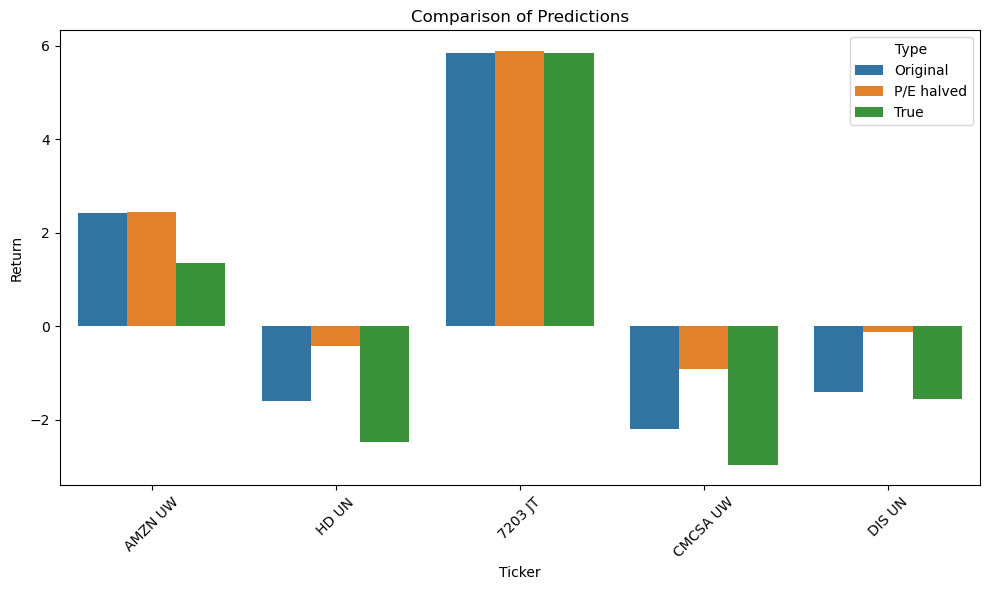

In [15]:
# Question 5: plot and compare estimates. Are these results expected ?
plt.figure(figsize=(10,6))
sns.barplot(data=df_plot_melt, x='Ticker', y='Return', hue='Type')
plt.xticks(rotation=45)
plt.title("Comparison of Predictions")
plt.tight_layout()
plt.show()

# 5. Visualising Individual Tree Predictions

In [17]:
# Question 6: use the np.column_stack function on individual tree predictions
# rf.predict(x) is just the equal-weighted average across the trees

# Get predictions from each tree for the consumer discretionary group
all_tree_preds = np.column_stack([
    tree.predict(X_consumer)
    for tree in rf.estimators_
])
df_trees = pd.DataFrame(all_tree_preds, index = X_consumer.index)

c:\Users\Emile\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Emile\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Emile\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Emile\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Emile\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Emile\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fi

In [18]:
# Question 7: compare y_pred = rf.predict(X_consumer) and mean_preds = df_trees.mean(axis=1). Are they equal ? They should be.
mean_preds = df_trees.mean(axis=1)
print("Check mean equality:", np.allclose(y_pred, mean_preds))

Check mean equality: True


C:\Users\Emile\AppData\Local\Temp\ipykernel_5324\94500122.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_trees.loc[ticker, :], shade = True, label = ticker, alpha = 0.5)
C:\Users\Emile\AppData\Local\Temp\ipykernel_5324\94500122.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_trees.loc[ticker, :], shade = True, label = ticker, alpha = 0.5)
C:\Users\Emile\AppData\Local\Temp\ipykernel_5324\94500122.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_trees.loc[ticker, :], shade = True, label = ticker, alpha = 0.5)
C:\Users\Emile\AppData\Local\Temp\ipykernel_5324\94500122.py:4: FutureWarning: 

`shade` is no

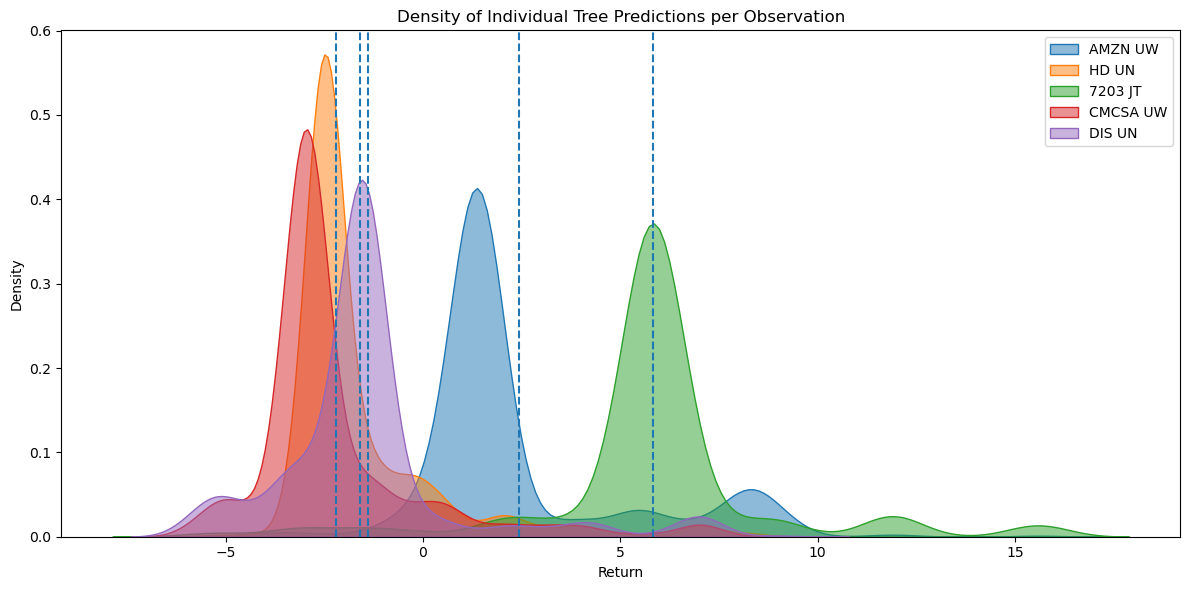

In [19]:
plt.figure(figsize = (12,6))
# For each stock, plot the density of its tree predictions
for ticker in X_consumer.index:
    sns.kdeplot(df_trees.loc[ticker, :], shade = True, label = ticker, alpha = 0.5)
    plt.axvline(mean_preds.loc[ticker], linestyle = 'dashed')
plt.title('Density of Individual Tree Predictions per Observation')
plt.xlabel('Return')
plt.legend()
plt.tight_layout()
plt.show()

# 6. Variable Importance

In [20]:
importances = rf.feature_importances_
features = X.columns
df_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by = 'Importance', ascending=False)


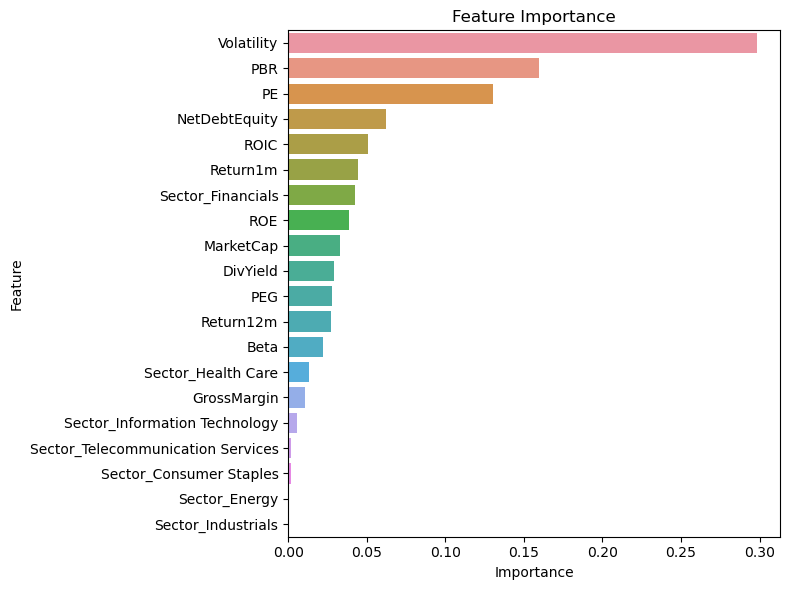

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_importance, x='Importance', y='Feature', orient='h')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()